In [5]:
from __future__ import division
import imp
from astropy.stats import biweight_midcorrelation
import pandas as pd
import numpy as np
from scipy import stats
import sys
import os
os.chdir('/Users/serdarturkaslan/Documents/GitHub/GbmMINER/data/MINER_MicroLowessRNATMM.08.24.2020/')
import miner_py3_kk as miner
imp.reload(miner)
import warnings
from tqdm.notebook import tqdm, trange
import time    # to be used in loop iterations



warnings.filterwarnings("ignore")
appended_data = []
regulondf = pd.read_csv("regulonDf-noindex.csv", header = 0)
expressionData = pd.read_csv("GbmMicroRNAMergedWithIDsZScored.csv", header=0, index_col = 0)
coherentMemberDf = pd.read_csv("coherentMembers.csv",header=0,index_col = 0, sep=",")
coherentMemberDf.astype('str') 
coherentMemberDf.index = [str(i) for i in coherentMemberDf.index]
corrvals = []
corrstats = []
input_path = os.getcwd()
regulonDfMicroGbmlist = list(regulondf['Regulon_ID'].drop_duplicates())
regulonDfMicroGbmlist = [str(i) for i in regulonDfMicroGbmlist]
regulondf["Regulon_ID"] = regulondf["Regulon_ID"].astype(str)
regulonModules = {}
for i in regulonDfMicroGbmlist:
    regulonModules[i]= list(regulondf[regulondf['Regulon_ID']==i]['Gene'])
eigengenes = miner.getEigengenes(regulonModules,expressionData,regulon_dict=None,saveFolder=None)
eigenScale = np.percentile(expressionData,95)/np.percentile(eigengenes,95)
eigengenes = eigenScale*eigengenes
regulon_list = list(set(eigengenes.index))
regulon_list = [str(i) for i in regulon_list]
eigengenes.index = np.array(eigengenes.index).astype(str)
#write eigengenes to .csv
#eigengenes.to_csv(os.path.join(resultsDirectory,"eigengenesmiRNAAndTFRegulon.csv"))
for j in tqdm(regulon_list):
    time.sleep(0.01)
    regulon_df = regulondf[regulondf['Regulon_ID'] == j]
    coherentmembers = [k for k in coherentMemberDf.columns if coherentMemberDf.loc[j,k] == 1]
    if(len(coherentmembers) != 0):
        if regulon_df.iloc[0,1] in expressionData.index:
            geneexp_reg = expressionData.loc[regulon_df.iloc[0,1],coherentmembers]
            geneexp_reg.replace("", np.nan, inplace=True)
            geneexp_reg = geneexp_reg.dropna()
            geneexp_reg = np.array(geneexp_reg)
            temp_listcorr = []
            if str(j) in eigengenes.index:
                geneexp_reguloneiggene = eigengenes.loc[str(j),coherentmembers]
                geneexp_reguloneiggene.replace("", np.nan, inplace=True)
                geneexp_reguloneiggene = geneexp_reguloneiggene.dropna()
                geneexp_reguloneiggene = np.array(geneexp_reguloneiggene)
                for i in range(len(regulon_df)):
                    if regulon_df.iloc[i,2] in expressionData.index:
                        geneexp_regulongene = expressionData.loc[regulon_df.iloc[i,2],coherentmembers]
                        geneexp_regulongene.replace("", np.nan, inplace=True)
                        geneexp_regulongene = geneexp_regulongene.dropna()
                        geneexp_regulongene = np.array(geneexp_regulongene)
                        temp_listcorr.append(stats.spearmanr(geneexp_reg, geneexp_regulongene)[0])
                        corrvals.append([j, regulon_df.iloc[0,1], regulon_df.iloc[i,2],stats.spearmanr(geneexp_reg, geneexp_regulongene)[0],stats.spearmanr(geneexp_reg, geneexp_regulongene)[1],stats.spearmanr(geneexp_reg, geneexp_reguloneiggene)[0],stats.spearmanr(geneexp_reg, geneexp_reguloneiggene)[1]])
                pos_count, neg_count = 0, 0
                # enhanced for loop  
                for num in temp_listcorr:
                   # check for being positive
                   if num >= 0:
                      pos_count += 1
                   else:
                      neg_count += 1
                corrstats.append([j, regulon_df.iloc[0,1], pos_count, neg_count])
                #print(j)
        
df1 = pd.DataFrame(corrvals) 
df1.columns = ['Regulon_ID', 'Regulator', 'RegulonGene', 'SpearmanCorrelationExp', 'SpearmanCorrelationPValExp', 'SpearmanCorrelationEigenGene', 'SpearmanCorrelationPValEigenGene']
df1.to_csv("GbmMicroRNAmiRNATFRegulatorRegulonSpearmanCorrelations.csv")         

  0%|          | 0/3764 [00:00<?, ?it/s]

# Easy method to get inflection point

[ 0.          2.28571429  4.57142857  6.85714286  9.14285714 11.42857143
 13.71428571 16.        ]
[1 1 1 1 1 3 1]
5


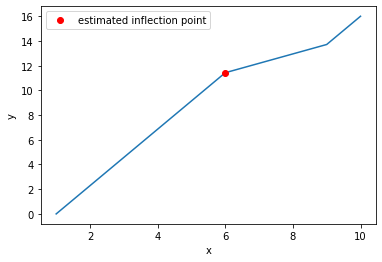

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from  scipy.stats import norm

x_min = 0.0
x_max = 16.0

mean = 8
std = 2

x = np.linspace(x_min, x_max, 8)
y = np.array([1,2,3,4,5,6,9,10])

print(x)

# 1st inflection point estimation
dy = np.diff(y)
print(dy)
# first derivative
idx_max_dy = np.argmax(dy)
print(idx_max_dy)

# Graph
plt.plot(y, x)
plt.plot(y[idx_max_dy], x[idx_max_dy], 'or', label='estimated inflection point')
plt.xlabel('x'); plt.ylabel('y'); plt.legend(); 